In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import sys
sys.path.append("../exp2/")
import gpflow
import tensorflow as tf
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/deepak/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/deepak/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/deepak/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/deepak/anaconda3/envs/tf_gpu/lib/python3

In [3]:
df = pd.read_csv("../data/beijingb_scaled.csv", index_col = 0)
df = df.rename(columns={'ts': 'Time', 'station_id': 'Station'})

In [4]:
stations = df['Station'].unique()
stations.sort()

In [5]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [6]:
splits = 6

In [7]:
from sklearn.model_selection import KFold

In [8]:
kfout = KFold(n_splits=splits, shuffle=True, random_state=0)
kfin = KFold(n_splits=splits - 1, shuffle=True, random_state=0)

In [9]:
station_split = {}

In [10]:
for kout, (sts_ftrain_index, sts_test_index) in enumerate(kfout.split(stations)):
    station_split[kout] = {}
    for kin, (sts_train_index, sts_val_index) in enumerate(kfin.split(sts_ftrain_index)):
        sts_test = stations[sts_test_index]
        sts_val = stations[sts_ftrain_index[sts_val_index]]
        sts_train = stations[sts_ftrain_index[sts_train_index]]
        station_split[kout][kin] = {
            'sts_test': sts_test,
            'sts_val': sts_val,
            'sts_train': sts_train,
        }

In [10]:
station_split

{0: {0: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1003., 1011., 1014., 1029., 1033., 1035.]),
   'sts_train': array([1001., 1002., 1004., 1005., 1006., 1007., 1008., 1009., 1010.,
          1012., 1013., 1015., 1018., 1019., 1020., 1022., 1024., 1025.,
          1026., 1027., 1028., 1030., 1034., 1036.])},
  1: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1006., 1012., 1019., 1020., 1027., 1034.]),
   'sts_train': array([1001., 1002., 1003., 1004., 1005., 1007., 1008., 1009., 1010.,
          1011., 1013., 1014., 1015., 1018., 1022., 1024., 1025., 1026.,
          1028., 1029., 1030., 1033., 1035., 1036.])},
  2: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1002., 1009., 1015., 1025., 1028., 1036.]),
   'sts_train': array([1001., 1003., 1004., 1005., 1006., 1007., 1008., 1010., 1011.,
          1012., 1013., 1014., 1018., 1019., 1020., 1022., 1024., 1026.,
        

In [11]:
station_split

{0: {0: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1003., 1011., 1014., 1029., 1033., 1035.]),
   'sts_train': array([1001., 1002., 1004., 1005., 1006., 1007., 1008., 1009., 1010.,
          1012., 1013., 1015., 1018., 1019., 1020., 1022., 1024., 1025.,
          1026., 1027., 1028., 1030., 1034., 1036.])},
  1: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1006., 1012., 1019., 1020., 1027., 1034.]),
   'sts_train': array([1001., 1002., 1003., 1004., 1005., 1007., 1008., 1009., 1010.,
          1011., 1013., 1014., 1015., 1018., 1022., 1024., 1025., 1026.,
          1028., 1029., 1030., 1033., 1035., 1036.])},
  2: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1002., 1009., 1015., 1025., 1028., 1036.]),
   'sts_train': array([1001., 1003., 1004., 1005., 1006., 1007., 1008., 1010., 1011.,
          1012., 1013., 1014., 1018., 1019., 1020., 1022., 1024., 1026.,
        

In [18]:
val = 'Geeks'
print(f"{val}for{val} is a portal for {val}.") 
  
  
name = 'Tushar'
age = 23
print(f"Hello, My name is {name} and I'm {age} years old.") 


GeeksforGeeks is a portal for Geeks.
Hello, My name is Tushar and I'm 23 years old.


In [21]:
i = 0
j= 0

In [30]:
current_day = 30
k=30
rmse = 12.2532424

In [33]:
a = [[2, 3]]

In [36]:
np.save("2", a)

In [ ]:
if not os.path.exists(store_path):
    os.makedirs(store_path)
a
results.to_csv(store_path + '/results.csv', index=None)


In [32]:
f"results/final/{k}/{i}/{j}/"

'results/final/30/0/0/'

In [29]:
f"results/{k}/{i}/{j}/{current_day}/rmse/"



'results/30/0/0/30/rmse/'

In [41]:
from gpsampling import GPActive

# for i in station_split:
#     for j in station_split[i]:
        
    

gp = GPActive(
    df = df,
    train_stations = list(station_split[0][0]['sts_val']),
    pool_stations = list(station_split[0][0]['sts_train']),
    test_stations = list(station_split[0][0]['sts_test']),
    context_days = 9,
    frequency = 5,
    test_days = 50,
    train_days = 20,
    number_to_query = 1,
    number_of_seeds=20,
    fname=[0, 0]
)
gp.active_gp()

INIT DONE
True True
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 249.240659
  Number of iterations: 107
  Number of functions evaluations: 133


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 249.240659
  Number of iterations: 107
  Number of functions evaluations: 133


Current Day before update: 9

Current Day after update: 10
Stations added -  [1025.0]  on day  10

Train DataFrame Shape (66, 9)

Pool DataFrame Shape (249, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 267.574796
  Number of iterations: 193
  Number of functions evaluations: 227


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 267.574796
  Number of iterations: 193
  Number of functions evaluations: 227


Current Day before update: 10

Current Day after update: 11

Train DataFrame Shape (73, 9)

Pool DataFrame Shape (271, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 297.359376
  Number of iterations: 80
  Number of functions evaluations: 96


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 297.359376
  Number of iterations: 80
  Number of functions evaluations: 96


Current Day before update: 11

Current Day after update: 12

Train DataFrame Shape (80, 9)

Pool DataFrame Shape (293, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 320.223510
  Number of iterations: 255
  Number of functions evaluations: 304


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 320.223510
  Number of iterations: 255
  Number of functions evaluations: 304


Current Day before update: 12

Current Day after update: 13

Train DataFrame Shape (87, 9)

Pool DataFrame Shape (316, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 347.021814
  Number of iterations: 360
  Number of functions evaluations: 433


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 347.021814
  Number of iterations: 360
  Number of functions evaluations: 433


Current Day before update: 13

Current Day after update: 14

Train DataFrame Shape (94, 9)

Pool DataFrame Shape (337, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 373.506488
  Number of iterations: 274
  Number of functions evaluations: 321


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 373.506488
  Number of iterations: 274
  Number of functions evaluations: 321


Current Day before update: 14

Current Day after update: 15
Stations added -  [1028.0]  on day  15

Train DataFrame Shape (102, 9)

Pool DataFrame Shape (343, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 403.724499
  Number of iterations: 489
  Number of functions evaluations: 608


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 403.724499
  Number of iterations: 489
  Number of functions evaluations: 608


Current Day before update: 15

Current Day after update: 16

Train DataFrame Shape (110, 9)

Pool DataFrame Shape (364, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 431.232576
  Number of iterations: 115
  Number of functions evaluations: 140


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 431.232576
  Number of iterations: 115
  Number of functions evaluations: 140


Current Day before update: 16

Current Day after update: 17

Train DataFrame Shape (118, 9)

Pool DataFrame Shape (385, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 467.578535
  Number of iterations: 262
  Number of functions evaluations: 320


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 467.578535
  Number of iterations: 262
  Number of functions evaluations: 320


Current Day before update: 17

Current Day after update: 18

Train DataFrame Shape (126, 9)

Pool DataFrame Shape (406, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 506.426289
  Number of iterations: 263
  Number of functions evaluations: 330


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 506.426289
  Number of iterations: 263
  Number of functions evaluations: 330


Current Day before update: 18

Current Day after update: 19

Train DataFrame Shape (134, 9)

Pool DataFrame Shape (427, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 540.633824
  Number of iterations: 132
  Number of functions evaluations: 163


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 540.633824
  Number of iterations: 132
  Number of functions evaluations: 163


Current Day before update: 19

Current Day after update: 20
Stations added -  [1034.0]  on day  20

Train DataFrame Shape (136, 9)

Pool DataFrame Shape (434, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 547.012438
  Number of iterations: 454
  Number of functions evaluations: 532


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 547.012438
  Number of iterations: 454
  Number of functions evaluations: 532


Current Day before update: 20

Current Day after update: 21

Train DataFrame Shape (138, 9)

Pool DataFrame Shape (455, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 552.603620
  Number of iterations: 618
  Number of functions evaluations: 730


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 552.603620
  Number of iterations: 618
  Number of functions evaluations: 730


Current Day before update: 21

Current Day after update: 22

Train DataFrame Shape (142, 9)

Pool DataFrame Shape (476, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 584.369347
  Number of iterations: 124
  Number of functions evaluations: 149


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 584.369347
  Number of iterations: 124
  Number of functions evaluations: 149


Current Day before update: 22

Current Day after update: 23

Train DataFrame Shape (145, 9)

Pool DataFrame Shape (496, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 590.043027
  Number of iterations: 460
  Number of functions evaluations: 559


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 590.043027
  Number of iterations: 460
  Number of functions evaluations: 559


Current Day before update: 23

Current Day after update: 24

Train DataFrame Shape (148, 9)

Pool DataFrame Shape (516, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 611.045648
  Number of iterations: 315
  Number of functions evaluations: 365


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 611.045648
  Number of iterations: 315
  Number of functions evaluations: 365


Current Day before update: 24

Current Day after update: 25
Stations added -  [1019.0]  on day  25

Train DataFrame Shape (152, 9)

Pool DataFrame Shape (515, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 616.153015
  Number of iterations: 391
  Number of functions evaluations: 480


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 616.153015
  Number of iterations: 391
  Number of functions evaluations: 480


Current Day before update: 25

Current Day after update: 26

Train DataFrame Shape (156, 9)

Pool DataFrame Shape (534, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 636.094459
  Number of iterations: 289
  Number of functions evaluations: 350


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 636.094459
  Number of iterations: 289
  Number of functions evaluations: 350


Current Day before update: 26

Current Day after update: 27

Train DataFrame Shape (160, 9)

Pool DataFrame Shape (553, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 650.719501
  Number of iterations: 324
  Number of functions evaluations: 385


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 650.719501
  Number of iterations: 324
  Number of functions evaluations: 385


Current Day before update: 27

Current Day after update: 28

Train DataFrame Shape (162, 9)

Pool DataFrame Shape (572, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 660.626408
  Number of iterations: 398
  Number of functions evaluations: 482


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 660.626408
  Number of iterations: 398
  Number of functions evaluations: 482


Current Day before update: 28

Current Day after update: 29

Train DataFrame Shape (165, 9)

Pool DataFrame Shape (590, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 680.617456
  Number of iterations: 255
  Number of functions evaluations: 298


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 680.617456
  Number of iterations: 255
  Number of functions evaluations: 298


Current Day before update: 29

Current Day after update: 30
Stations added -  [1036.0]  on day  30

Train DataFrame Shape (166, 9)

Pool DataFrame Shape (585, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 683.491192
  Number of iterations: 284
  Number of functions evaluations: 335


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 683.491192
  Number of iterations: 284
  Number of functions evaluations: 335


Current Day before update: 30

Current Day after update: 31

Train DataFrame Shape (168, 9)

Pool DataFrame Shape (603, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 684.882528
  Number of iterations: 233
  Number of functions evaluations: 282


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 684.882528
  Number of iterations: 233
  Number of functions evaluations: 282


Current Day before update: 31

Current Day after update: 32

Train DataFrame Shape (170, 9)

Pool DataFrame Shape (622, 11)

Test DataFrame Shape (5, 9)


KeyboardInterrupt: 

In [42]:
gp.random_sampling()

Seed is 0
Current Day before update: 9

Current Day after update: 10
Stations added -  [1015.]

Train DataFrame Shape (66, 9)

Pool DataFrame Shape (249, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 267.322027
  Number of iterations: 224
  Number of functions evaluations: 279


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 267.322027
  Number of iterations: 224
  Number of functions evaluations: 279


Current Day before update: 10

Current Day after update: 11

Train DataFrame Shape (73, 9)

Pool DataFrame Shape (271, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 296.495160
  Number of iterations: 149
  Number of functions evaluations: 183


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 296.495160
  Number of iterations: 149
  Number of functions evaluations: 183


Current Day before update: 11

Current Day after update: 12

Train DataFrame Shape (80, 9)

Pool DataFrame Shape (293, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 326.185539
  Number of iterations: 102
  Number of functions evaluations: 129


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 326.185539
  Number of iterations: 102
  Number of functions evaluations: 129


Current Day before update: 12

Current Day after update: 13

Train DataFrame Shape (87, 9)

Pool DataFrame Shape (316, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 348.637903
  Number of iterations: 87
  Number of functions evaluations: 109


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 348.637903
  Number of iterations: 87
  Number of functions evaluations: 109


Current Day before update: 13

Current Day after update: 14

Train DataFrame Shape (94, 9)

Pool DataFrame Shape (337, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 374.034208
  Number of iterations: 150
  Number of functions evaluations: 191


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 374.034208
  Number of iterations: 150
  Number of functions evaluations: 191


Current Day before update: 14

Current Day after update: 15
Stations added -  [1026.]

Train DataFrame Shape (102, 9)

Pool DataFrame Shape (343, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 401.494197
  Number of iterations: 380
  Number of functions evaluations: 449


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 401.494197
  Number of iterations: 380
  Number of functions evaluations: 449


Current Day before update: 15

Current Day after update: 16

Train DataFrame Shape (110, 9)

Pool DataFrame Shape (364, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 429.460199
  Number of iterations: 434
  Number of functions evaluations: 534


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 429.460199
  Number of iterations: 434
  Number of functions evaluations: 534


Current Day before update: 16

Current Day after update: 17

Train DataFrame Shape (118, 9)

Pool DataFrame Shape (385, 11)

Test DataFrame Shape (6, 9)


KeyboardInterrupt: 

Current Day before update: 9

Current Day after update: 10
Stations added -  [1025.0]  on day  10

Train DataFrame Shape (66, 9)

Pool DataFrame Shape (249, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 267.574564
  Number of iterations: 236
  Number of functions evaluations: 272


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 267.574564
  Number of iterations: 236
  Number of functions evaluations: 272


AttributeError: 'GPActive' object has no attribute 'fname'

In [16]:
import pickle
with open('company_data.pkl', 'wb') as output:
#     company1 = Company('banana', 40)
    pickle.dump(gp, output, pickle.HIGHEST_PROTOCOL)


TypeError: can't pickle _thread.RLock objects

In [14]:
gp.active_gp()

Current Day before update: 9

Current Day after update: 10
Stations added -  [1028.0]  on day  10

Train DataFrame Shape (66, 9)

Pool DataFrame Shape (249, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 266.650989
  Number of iterations: 192
  Number of functions evaluations: 214


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 266.650989
  Number of iterations: 192
  Number of functions evaluations: 214


Current Day before update: 10

Current Day after update: 11

Train DataFrame Shape (73, 9)

Pool DataFrame Shape (271, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 304.705366
  Number of iterations: 308
  Number of functions evaluations: 354


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 304.705366
  Number of iterations: 308
  Number of functions evaluations: 354


Current Day before update: 11

Current Day after update: 12

Train DataFrame Shape (80, 9)

Pool DataFrame Shape (293, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 317.703534
  Number of iterations: 319
  Number of functions evaluations: 387


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 317.703534
  Number of iterations: 319
  Number of functions evaluations: 387


Current Day before update: 12

Current Day after update: 13

Train DataFrame Shape (87, 9)

Pool DataFrame Shape (316, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 344.143531
  Number of iterations: 340
  Number of functions evaluations: 401


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 344.143531
  Number of iterations: 340
  Number of functions evaluations: 401


Current Day before update: 13

Current Day after update: 14

Train DataFrame Shape (94, 9)

Pool DataFrame Shape (337, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 370.106125
  Number of iterations: 245
  Number of functions evaluations: 280


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 370.106125
  Number of iterations: 245
  Number of functions evaluations: 280


Current Day before update: 14

Current Day after update: 15
Stations added -  [1036.0]  on day  15

Train DataFrame Shape (102, 9)

Pool DataFrame Shape (343, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 394.308180
  Number of iterations: 595
  Number of functions evaluations: 713


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 394.308180
  Number of iterations: 595
  Number of functions evaluations: 713


Current Day before update: 15

Current Day after update: 16

Train DataFrame Shape (110, 9)

Pool DataFrame Shape (364, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 427.263043
  Number of iterations: 370
  Number of functions evaluations: 474


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 427.263043
  Number of iterations: 370
  Number of functions evaluations: 474


Current Day before update: 16

Current Day after update: 17

Train DataFrame Shape (118, 9)

Pool DataFrame Shape (385, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 462.669669
  Number of iterations: 207
  Number of functions evaluations: 238


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 462.669669
  Number of iterations: 207
  Number of functions evaluations: 238


Current Day before update: 17

Current Day after update: 18

Train DataFrame Shape (126, 9)

Pool DataFrame Shape (406, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 494.660029
  Number of iterations: 256
  Number of functions evaluations: 294


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 494.660029
  Number of iterations: 256
  Number of functions evaluations: 294


Current Day before update: 18

Current Day after update: 19

Train DataFrame Shape (134, 9)

Pool DataFrame Shape (427, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 527.158071
  Number of iterations: 553
  Number of functions evaluations: 671


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 527.158071
  Number of iterations: 553
  Number of functions evaluations: 671


Current Day before update: 19

Current Day after update: 20
Stations added -  [1034.0]  on day  20

Train DataFrame Shape (136, 9)

Pool DataFrame Shape (434, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 543.223765
  Number of iterations: 435
  Number of functions evaluations: 526


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 543.223765
  Number of iterations: 435
  Number of functions evaluations: 526


Current Day before update: 20

Current Day after update: 21

Train DataFrame Shape (138, 9)

Pool DataFrame Shape (455, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 565.894792
  Number of iterations: 181
  Number of functions evaluations: 231


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 565.894792
  Number of iterations: 181
  Number of functions evaluations: 231


Current Day before update: 21

Current Day after update: 22

Train DataFrame Shape (142, 9)

Pool DataFrame Shape (476, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 588.612129
  Number of iterations: 119
  Number of functions evaluations: 158


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 588.612129
  Number of iterations: 119
  Number of functions evaluations: 158


Current Day before update: 22

Current Day after update: 23

Train DataFrame Shape (144, 9)

Pool DataFrame Shape (497, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 596.193817
  Number of iterations: 360
  Number of functions evaluations: 439


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 596.193817
  Number of iterations: 360
  Number of functions evaluations: 439


Current Day before update: 23

Current Day after update: 24

Train DataFrame Shape (146, 9)

Pool DataFrame Shape (518, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 606.167034
  Number of iterations: 392
  Number of functions evaluations: 446


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 606.167034
  Number of iterations: 392
  Number of functions evaluations: 446


Current Day before update: 24

Current Day after update: 25
Stations added -  [1019.0]  on day  25

Train DataFrame Shape (149, 9)

Pool DataFrame Shape (518, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 617.680250
  Number of iterations: 175
  Number of functions evaluations: 223


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 617.680250
  Number of iterations: 175
  Number of functions evaluations: 223


Current Day before update: 25

Current Day after update: 26

Train DataFrame Shape (152, 9)

Pool DataFrame Shape (538, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 629.062603
  Number of iterations: 308
  Number of functions evaluations: 345


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 629.062603
  Number of iterations: 308
  Number of functions evaluations: 345


Current Day before update: 26

Current Day after update: 27

Train DataFrame Shape (155, 9)

Pool DataFrame Shape (558, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  Objective function value: 640.381947
  Number of iterations: 364
  Number of functions evaluations: 443


INFO:tensorflow:Optimization terminated with:
  Message: b'ABNORMAL_TERMINATION_IN_LNSRCH'
  Objective function value: 640.381947
  Number of iterations: 364
  Number of functions evaluations: 443


Current Day before update: 27

Current Day after update: 28

Train DataFrame Shape (156, 9)

Pool DataFrame Shape (578, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 646.047512
  Number of iterations: 309
  Number of functions evaluations: 359


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 646.047512
  Number of iterations: 309
  Number of functions evaluations: 359


Current Day before update: 28

Current Day after update: 29

Train DataFrame Shape (158, 9)

Pool DataFrame Shape (597, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 655.069428
  Number of iterations: 275
  Number of functions evaluations: 324


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 655.069428
  Number of iterations: 275
  Number of functions evaluations: 324


Current Day before update: 29

Current Day after update: 30
Stations added -  [1005.0]  on day  30

Train DataFrame Shape (159, 9)

Pool DataFrame Shape (585, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 659.770883
  Number of iterations: 268
  Number of functions evaluations: 312


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 659.770883
  Number of iterations: 268
  Number of functions evaluations: 312


Current Day before update: 30

Current Day after update: 31

Train DataFrame Shape (161, 9)

Pool DataFrame Shape (603, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 663.330525
  Number of iterations: 183
  Number of functions evaluations: 214


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 663.330525
  Number of iterations: 183
  Number of functions evaluations: 214


Current Day before update: 31

Current Day after update: 32

Train DataFrame Shape (163, 9)

Pool DataFrame Shape (622, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 671.117967
  Number of iterations: 373
  Number of functions evaluations: 461


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 671.117967
  Number of iterations: 373
  Number of functions evaluations: 461


Current Day before update: 32

Current Day after update: 33

Train DataFrame Shape (166, 9)

Pool DataFrame Shape (641, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 677.789173
  Number of iterations: 449
  Number of functions evaluations: 556


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 677.789173
  Number of iterations: 449
  Number of functions evaluations: 556


Current Day before update: 33

Current Day after update: 34

Train DataFrame Shape (169, 9)

Pool DataFrame Shape (660, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 692.977847
  Number of iterations: 268
  Number of functions evaluations: 321


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 692.977847
  Number of iterations: 268
  Number of functions evaluations: 321


Current Day before update: 34

Current Day after update: 35
Stations added -  [1030.0]  on day  35

Train DataFrame Shape (172, 9)

Pool DataFrame Shape (643, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 707.263861
  Number of iterations: 174
  Number of functions evaluations: 208


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 707.263861
  Number of iterations: 174
  Number of functions evaluations: 208


Current Day before update: 35

Current Day after update: 36

Train DataFrame Shape (176, 9)

Pool DataFrame Shape (661, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 725.277235
  Number of iterations: 139
  Number of functions evaluations: 162


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 725.277235
  Number of iterations: 139
  Number of functions evaluations: 162


Current Day before update: 36

Current Day after update: 37

Train DataFrame Shape (180, 9)

Pool DataFrame Shape (679, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 743.897561
  Number of iterations: 202
  Number of functions evaluations: 243


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 743.897561
  Number of iterations: 202
  Number of functions evaluations: 243


Current Day before update: 37

Current Day after update: 38

Train DataFrame Shape (184, 9)

Pool DataFrame Shape (697, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 743.105337
  Number of iterations: 198
  Number of functions evaluations: 245


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 743.105337
  Number of iterations: 198
  Number of functions evaluations: 245


Current Day before update: 38

Current Day after update: 39

Train DataFrame Shape (188, 9)

Pool DataFrame Shape (715, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 749.814515
  Number of iterations: 425
  Number of functions evaluations: 487


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 749.814515
  Number of iterations: 425
  Number of functions evaluations: 487


Current Day before update: 39

Current Day after update: 40
Stations added -  [1027.0]  on day  40

Train DataFrame Shape (193, 9)

Pool DataFrame Shape (695, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 756.847963
  Number of iterations: 250
  Number of functions evaluations: 280


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 756.847963
  Number of iterations: 250
  Number of functions evaluations: 280


Current Day before update: 40

Current Day after update: 41

Train DataFrame Shape (198, 9)

Pool DataFrame Shape (712, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 770.760068
  Number of iterations: 175
  Number of functions evaluations: 229


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 770.760068
  Number of iterations: 175
  Number of functions evaluations: 229


Current Day before update: 41

Current Day after update: 42

Train DataFrame Shape (202, 9)

Pool DataFrame Shape (729, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 782.100813
  Number of iterations: 246
  Number of functions evaluations: 289


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 782.100813
  Number of iterations: 246
  Number of functions evaluations: 289


Current Day before update: 42

Current Day after update: 43

Train DataFrame Shape (207, 9)

Pool DataFrame Shape (746, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 815.020094
  Number of iterations: 658
  Number of functions evaluations: 779


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 815.020094
  Number of iterations: 658
  Number of functions evaluations: 779


Current Day before update: 43

Current Day after update: 44

Train DataFrame Shape (212, 9)

Pool DataFrame Shape (763, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 875.903331
  Number of iterations: 457
  Number of functions evaluations: 540


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 875.903331
  Number of iterations: 457
  Number of functions evaluations: 540


Current Day before update: 44

Current Day after update: 45
Stations added -  [1024.0]  on day  45

Train DataFrame Shape (217, 9)

Pool DataFrame Shape (734, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 915.164478
  Number of iterations: 143
  Number of functions evaluations: 190


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 915.164478
  Number of iterations: 143
  Number of functions evaluations: 190


Current Day before update: 45

Current Day after update: 46

Train DataFrame Shape (221, 9)

Pool DataFrame Shape (750, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 993.847024
  Number of iterations: 322
  Number of functions evaluations: 374


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 993.847024
  Number of iterations: 322
  Number of functions evaluations: 374


Current Day before update: 46

Current Day after update: 47

Train DataFrame Shape (225, 9)

Pool DataFrame Shape (766, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 987.227716
  Number of iterations: 570
  Number of functions evaluations: 668


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 987.227716
  Number of iterations: 570
  Number of functions evaluations: 668


Current Day before update: 47

Current Day after update: 48

Train DataFrame Shape (231, 9)

Pool DataFrame Shape (782, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1018.606587
  Number of iterations: 380
  Number of functions evaluations: 473


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1018.606587
  Number of iterations: 380
  Number of functions evaluations: 473


Current Day before update: 48

Current Day after update: 49

Train DataFrame Shape (236, 9)

Pool DataFrame Shape (798, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1054.915950
  Number of iterations: 340
  Number of functions evaluations: 379


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1054.915950
  Number of iterations: 340
  Number of functions evaluations: 379


Current Day before update: 49

Current Day after update: 50
Stations added -  [1025.0]  on day  50

Train DataFrame Shape (242, 9)

Pool DataFrame Shape (763, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1080.402312
  Number of iterations: 283
  Number of functions evaluations: 326


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1080.402312
  Number of iterations: 283
  Number of functions evaluations: 326


Current Day before update: 50

Current Day after update: 51

Train DataFrame Shape (247, 9)

Pool DataFrame Shape (778, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1100.527222
  Number of iterations: 244
  Number of functions evaluations: 282


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1100.527222
  Number of iterations: 244
  Number of functions evaluations: 282


Current Day before update: 51

Current Day after update: 52

Train DataFrame Shape (252, 9)

Pool DataFrame Shape (793, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1119.396005
  Number of iterations: 269
  Number of functions evaluations: 310


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1119.396005
  Number of iterations: 269
  Number of functions evaluations: 310


Current Day before update: 52

Current Day after update: 53

Train DataFrame Shape (255, 9)

Pool DataFrame Shape (808, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1129.086621
  Number of iterations: 469
  Number of functions evaluations: 547


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1129.086621
  Number of iterations: 469
  Number of functions evaluations: 547


Current Day before update: 53

Current Day after update: 54

Train DataFrame Shape (259, 9)

Pool DataFrame Shape (823, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1133.710496
  Number of iterations: 344
  Number of functions evaluations: 404


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1133.710496
  Number of iterations: 344
  Number of functions evaluations: 404


Current Day before update: 54

Current Day after update: 55
Stations added -  [1001.0]  on day  55

Train DataFrame Shape (263, 9)

Pool DataFrame Shape (782, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1163.187806
  Number of iterations: 189
  Number of functions evaluations: 206


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1163.187806
  Number of iterations: 189
  Number of functions evaluations: 206


Current Day before update: 55

Current Day after update: 56

Train DataFrame Shape (266, 9)

Pool DataFrame Shape (796, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1176.181813
  Number of iterations: 295
  Number of functions evaluations: 348


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1176.181813
  Number of iterations: 295
  Number of functions evaluations: 348


Current Day before update: 56

Current Day after update: 57

Train DataFrame Shape (269, 9)

Pool DataFrame Shape (810, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1187.202826
  Number of iterations: 195
  Number of functions evaluations: 226


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1187.202826
  Number of iterations: 195
  Number of functions evaluations: 226


Current Day before update: 57

Current Day after update: 58

Train DataFrame Shape (272, 9)

Pool DataFrame Shape (824, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1200.052974
  Number of iterations: 297
  Number of functions evaluations: 336


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1200.052974
  Number of iterations: 297
  Number of functions evaluations: 336


Current Day before update: 58

Current Day after update: 59

Train DataFrame Shape (275, 9)

Pool DataFrame Shape (838, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1233.256230
  Number of iterations: 248
  Number of functions evaluations: 279


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1233.256230
  Number of iterations: 248
  Number of functions evaluations: 279


In [29]:
gp.active_gp()

Current Day before update: 59

Current Day after update: 60
Stations added -  [1002.0]  on day  60

Train DataFrame Shape (276, 9)

Pool DataFrame Shape (791, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1242.546946
  Number of iterations: 319
  Number of functions evaluations: 376


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1242.546946
  Number of iterations: 319
  Number of functions evaluations: 376


Current Day before update: 60

Current Day after update: 61

Train DataFrame Shape (279, 9)

Pool DataFrame Shape (804, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1280.714860
  Number of iterations: 262
  Number of functions evaluations: 297


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1280.714860
  Number of iterations: 262
  Number of functions evaluations: 297


Current Day before update: 61

Current Day after update: 62

Train DataFrame Shape (282, 9)

Pool DataFrame Shape (817, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1301.552265
  Number of iterations: 300
  Number of functions evaluations: 352


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1301.552265
  Number of iterations: 300
  Number of functions evaluations: 352


Current Day before update: 62

Current Day after update: 63

Train DataFrame Shape (285, 9)

Pool DataFrame Shape (830, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1269.883504
  Number of iterations: 373
  Number of functions evaluations: 456


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1269.883504
  Number of iterations: 373
  Number of functions evaluations: 456


Current Day before update: 63

Current Day after update: 64

Train DataFrame Shape (288, 9)

Pool DataFrame Shape (843, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1285.330794
  Number of iterations: 343
  Number of functions evaluations: 406


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1285.330794
  Number of iterations: 343
  Number of functions evaluations: 406


Current Day before update: 64

Current Day after update: 65
Stations added -  [1026.0]  on day  65

Train DataFrame Shape (291, 9)

Pool DataFrame Shape (790, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1346.454424
  Number of iterations: 113
  Number of functions evaluations: 120


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1346.454424
  Number of iterations: 113
  Number of functions evaluations: 120


Current Day before update: 65

Current Day after update: 66

Train DataFrame Shape (296, 9)

Pool DataFrame Shape (802, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1281.221210
  Number of iterations: 501
  Number of functions evaluations: 620


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1281.221210
  Number of iterations: 501
  Number of functions evaluations: 620


Current Day before update: 66

Current Day after update: 67

Train DataFrame Shape (301, 9)

Pool DataFrame Shape (814, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1297.845925
  Number of iterations: 561
  Number of functions evaluations: 650


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1297.845925
  Number of iterations: 561
  Number of functions evaluations: 650


Current Day before update: 67

Current Day after update: 68

Train DataFrame Shape (306, 9)

Pool DataFrame Shape (826, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1307.869940
  Number of iterations: 361
  Number of functions evaluations: 431


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1307.869940
  Number of iterations: 361
  Number of functions evaluations: 431


Current Day before update: 68

Current Day after update: 69

Train DataFrame Shape (311, 9)

Pool DataFrame Shape (838, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1329.553202
  Number of iterations: 156
  Number of functions evaluations: 180


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1329.553202
  Number of iterations: 156
  Number of functions evaluations: 180


Current Day before update: 69

Current Day after update: 70
Stations added -  [1004.0]  on day  70

Train DataFrame Shape (316, 9)

Pool DataFrame Shape (779, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1399.384872
  Number of iterations: 84
  Number of functions evaluations: 114


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1399.384872
  Number of iterations: 84
  Number of functions evaluations: 114


Current Day before update: 70

Current Day after update: 71

Train DataFrame Shape (321, 9)

Pool DataFrame Shape (790, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1412.964829
  Number of iterations: 115
  Number of functions evaluations: 125


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1412.964829
  Number of iterations: 115
  Number of functions evaluations: 125


Current Day before update: 71

Current Day after update: 72

Train DataFrame Shape (326, 9)

Pool DataFrame Shape (801, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1437.612165
  Number of iterations: 135
  Number of functions evaluations: 142


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1437.612165
  Number of iterations: 135
  Number of functions evaluations: 142


Current Day before update: 72

Current Day after update: 73

Train DataFrame Shape (332, 9)

Pool DataFrame Shape (812, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1413.008399
  Number of iterations: 172
  Number of functions evaluations: 225


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1413.008399
  Number of iterations: 172
  Number of functions evaluations: 225


Current Day before update: 73

Current Day after update: 74

Train DataFrame Shape (336, 9)

Pool DataFrame Shape (823, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1434.443655
  Number of iterations: 370
  Number of functions evaluations: 461


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1434.443655
  Number of iterations: 370
  Number of functions evaluations: 461


Current Day before update: 74

Current Day after update: 75
Stations added -  [1012.0]  on day  75

Train DataFrame Shape (341, 9)

Pool DataFrame Shape (758, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1447.493939
  Number of iterations: 428
  Number of functions evaluations: 500


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1447.493939
  Number of iterations: 428
  Number of functions evaluations: 500


Current Day before update: 75

Current Day after update: 76

Train DataFrame Shape (346, 9)

Pool DataFrame Shape (768, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1528.013129
  Number of iterations: 134
  Number of functions evaluations: 160


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1528.013129
  Number of iterations: 134
  Number of functions evaluations: 160


Current Day before update: 76

Current Day after update: 77

Train DataFrame Shape (351, 9)

Pool DataFrame Shape (778, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1561.054227
  Number of iterations: 54
  Number of functions evaluations: 72


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1561.054227
  Number of iterations: 54
  Number of functions evaluations: 72


Current Day before update: 77

Current Day after update: 78

Train DataFrame Shape (356, 9)

Pool DataFrame Shape (788, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1511.847750
  Number of iterations: 208
  Number of functions evaluations: 241


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1511.847750
  Number of iterations: 208
  Number of functions evaluations: 241


Current Day before update: 78

Current Day after update: 79

Train DataFrame Shape (361, 9)

Pool DataFrame Shape (798, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1505.755207
  Number of iterations: 513
  Number of functions evaluations: 621


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1505.755207
  Number of iterations: 513
  Number of functions evaluations: 621


Current Day before update: 79

Current Day after update: 80
Stations added -  [1018.0]  on day  80

Train DataFrame Shape (368, 9)

Pool DataFrame Shape (729, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1519.710879
  Number of iterations: 205
  Number of functions evaluations: 288


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1519.710879
  Number of iterations: 205
  Number of functions evaluations: 288


Current Day before update: 80

Current Day after update: 81

Train DataFrame Shape (373, 9)

Pool DataFrame Shape (738, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1603.044375
  Number of iterations: 126
  Number of functions evaluations: 163


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1603.044375
  Number of iterations: 126
  Number of functions evaluations: 163


Current Day before update: 81

Current Day after update: 82

Train DataFrame Shape (378, 9)

Pool DataFrame Shape (747, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1521.538156
  Number of iterations: 313
  Number of functions evaluations: 374


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1521.538156
  Number of iterations: 313
  Number of functions evaluations: 374


Current Day before update: 82

Current Day after update: 83

Train DataFrame Shape (381, 9)

Pool DataFrame Shape (756, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1514.053494
  Number of iterations: 354
  Number of functions evaluations: 414


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1514.053494
  Number of iterations: 354
  Number of functions evaluations: 414


Current Day before update: 83

Current Day after update: 84

Train DataFrame Shape (384, 9)

Pool DataFrame Shape (765, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1500.829766
  Number of iterations: 190
  Number of functions evaluations: 240


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1500.829766
  Number of iterations: 190
  Number of functions evaluations: 240


Current Day before update: 84

Current Day after update: 85
Stations added -  [1006.0]  on day  85

Train DataFrame Shape (387, 9)

Pool DataFrame Shape (688, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1480.565356
  Number of iterations: 363
  Number of functions evaluations: 409


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1480.565356
  Number of iterations: 363
  Number of functions evaluations: 409


Current Day before update: 85

Current Day after update: 86

Train DataFrame Shape (391, 9)

Pool DataFrame Shape (696, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1456.607289
  Number of iterations: 412
  Number of functions evaluations: 478


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1456.607289
  Number of iterations: 412
  Number of functions evaluations: 478


Current Day before update: 86

Current Day after update: 87

Train DataFrame Shape (395, 9)

Pool DataFrame Shape (704, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1494.540671
  Number of iterations: 274
  Number of functions evaluations: 312


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1494.540671
  Number of iterations: 274
  Number of functions evaluations: 312


Current Day before update: 87

Current Day after update: 88

Train DataFrame Shape (399, 9)

Pool DataFrame Shape (712, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1538.576464
  Number of iterations: 306
  Number of functions evaluations: 358


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1538.576464
  Number of iterations: 306
  Number of functions evaluations: 358


Current Day before update: 88

Current Day after update: 89

Train DataFrame Shape (383, 9)

Pool DataFrame Shape (716, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1480.499302
  Number of iterations: 248
  Number of functions evaluations: 293


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1480.499302
  Number of iterations: 248
  Number of functions evaluations: 293


Current Day before update: 89

Current Day after update: 90
Stations added -  [1007.0]  on day  90

Train DataFrame Shape (366, 9)

Pool DataFrame Shape (631, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1421.174327
  Number of iterations: 207
  Number of functions evaluations: 239


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1421.174327
  Number of iterations: 207
  Number of functions evaluations: 239


Current Day before update: 90

Current Day after update: 91

Train DataFrame Shape (349, 9)

Pool DataFrame Shape (635, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1359.880074
  Number of iterations: 256
  Number of functions evaluations: 303


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1359.880074
  Number of iterations: 256
  Number of functions evaluations: 303


Current Day before update: 91

Current Day after update: 92

Train DataFrame Shape (332, 9)

Pool DataFrame Shape (639, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1301.881227
  Number of iterations: 318
  Number of functions evaluations: 389


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1301.881227
  Number of iterations: 318
  Number of functions evaluations: 389


Current Day before update: 92

Current Day after update: 93

Train DataFrame Shape (315, 9)

Pool DataFrame Shape (643, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1241.820005
  Number of iterations: 269
  Number of functions evaluations: 326


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1241.820005
  Number of iterations: 269
  Number of functions evaluations: 326


Current Day before update: 93

Current Day after update: 94

Train DataFrame Shape (299, 9)

Pool DataFrame Shape (647, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1172.643824
  Number of iterations: 203
  Number of functions evaluations: 235


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1172.643824
  Number of iterations: 203
  Number of functions evaluations: 235


Current Day before update: 94

Current Day after update: 95
Stations added -  [1010.0]  on day  95

Train DataFrame Shape (281, 9)

Pool DataFrame Shape (562, 11)

Test DataFrame Shape (1, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1094.910206
  Number of iterations: 451
  Number of functions evaluations: 546


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1094.910206
  Number of iterations: 451
  Number of functions evaluations: 546


Current Day before update: 95

Current Day after update: 96

Train DataFrame Shape (285, 9)

Pool DataFrame Shape (567, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1098.336221
  Number of iterations: 443
  Number of functions evaluations: 527


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1098.336221
  Number of iterations: 443
  Number of functions evaluations: 527


Current Day before update: 96

Current Day after update: 97

Train DataFrame Shape (289, 9)

Pool DataFrame Shape (572, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1114.090096
  Number of iterations: 147
  Number of functions evaluations: 204


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1114.090096
  Number of iterations: 147
  Number of functions evaluations: 204


Current Day before update: 97

Current Day after update: 98

Train DataFrame Shape (293, 9)

Pool DataFrame Shape (577, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1114.302127
  Number of iterations: 261
  Number of functions evaluations: 349


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1114.302127
  Number of iterations: 261
  Number of functions evaluations: 349


Current Day before update: 98

Current Day after update: 99

Train DataFrame Shape (297, 9)

Pool DataFrame Shape (582, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1135.407937
  Number of iterations: 119
  Number of functions evaluations: 193


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1135.407937
  Number of iterations: 119
  Number of functions evaluations: 193


Current Day before update: 99

Current Day after update: 100
Stations added -  [1008.0]  on day  100

Train DataFrame Shape (300, 9)

Pool DataFrame Shape (498, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1136.801870
  Number of iterations: 357
  Number of functions evaluations: 452


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1136.801870
  Number of iterations: 357
  Number of functions evaluations: 452


Current Day before update: 100

Current Day after update: 101

Train DataFrame Shape (304, 9)

Pool DataFrame Shape (502, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1142.195997
  Number of iterations: 278
  Number of functions evaluations: 377


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1142.195997
  Number of iterations: 278
  Number of functions evaluations: 377


Current Day before update: 101

Current Day after update: 102

Train DataFrame Shape (308, 9)

Pool DataFrame Shape (506, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1154.050912
  Number of iterations: 263
  Number of functions evaluations: 344


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1154.050912
  Number of iterations: 263
  Number of functions evaluations: 344


Current Day before update: 102

Current Day after update: 103

Train DataFrame Shape (314, 9)

Pool DataFrame Shape (511, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1193.361061
  Number of iterations: 93
  Number of functions evaluations: 206


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1193.361061
  Number of iterations: 93
  Number of functions evaluations: 206


Current Day before update: 103

Current Day after update: 104

Train DataFrame Shape (320, 9)

Pool DataFrame Shape (516, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1190.672557
  Number of iterations: 289
  Number of functions evaluations: 349


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1190.672557
  Number of iterations: 289
  Number of functions evaluations: 349


Current Day before update: 104

Current Day after update: 105
Stations added -  [1022.0]  on day  105

Train DataFrame Shape (326, 9)

Pool DataFrame Shape (422, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1207.906839
  Number of iterations: 227
  Number of functions evaluations: 270


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1207.906839
  Number of iterations: 227
  Number of functions evaluations: 270


Current Day before update: 105

Current Day after update: 106

Train DataFrame Shape (330, 9)

Pool DataFrame Shape (426, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1186.627529
  Number of iterations: 350
  Number of functions evaluations: 424


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1186.627529
  Number of iterations: 350
  Number of functions evaluations: 424


Current Day before update: 106

Current Day after update: 107

Train DataFrame Shape (334, 9)

Pool DataFrame Shape (430, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1154.066308
  Number of iterations: 256
  Number of functions evaluations: 332


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1154.066308
  Number of iterations: 256
  Number of functions evaluations: 332


Current Day before update: 107

Current Day after update: 108

Train DataFrame Shape (338, 9)

Pool DataFrame Shape (434, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1150.542784
  Number of iterations: 837
  Number of functions evaluations: 967


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1150.542784
  Number of iterations: 837
  Number of functions evaluations: 967


Current Day before update: 108

Current Day after update: 109

Train DataFrame Shape (361, 9)

Pool DataFrame Shape (438, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1229.786465
  Number of iterations: 536
  Number of functions evaluations: 649


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 1229.786465
  Number of iterations: 536
  Number of functions evaluations: 649


In [27]:
gp.pool_stations

[1002.0,
 1004.0,
 1006.0,
 1007.0,
 1008.0,
 1009.0,
 1010.0,
 1012.0,
 1013.0,
 1015.0,
 1018.0,
 1020.0,
 1022.0,
 1026.0]

In [15]:
import xgboost

In [16]:
## max_depth:10, lr =1, n_est: 10
## max_depth:10, lr = 1, m_est :50
## max_dpeth :10, lr:1 n_est:50
## max_dpeth:50, lr = 1, n_est10

In [17]:
learners = {0:xgboost.XGBRegressor(), 
            1:xgboost.XGBRegressor(max_depth=10, learning_rate=1, n_estimators=10),
            2:xgboost.XGBRegressor(max_depth=10, learning_rate=1, n_estimators=50),
            3:xgboost.XGBRegressor(max_depth=50, learning_rate=1, n_estimators=10),
            4:xgboost.XGBRegressor(max_depth=50, learning_rate=1, n_estimators=50),
           }

In [18]:
from qbc_random import ActiveLearning
al = ActiveLearning(
    df = df,
    train_stations = list(station_split[0][0]['sts_val']),
    pool_stations = list(station_split[0][0]['sts_train']),
    test_stations = list(station_split[0][0]['sts_test']),
    learners = learners,
    context_days = 9,
    frequency = 5,
    test_days = 100,
    train_days = 20,
    number_of_seeds = 5,
    number_to_query = 1
            )
al.querybycommittee()

[02:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 9

Current Day after update: 10
Stations added -  [1024.0]  on day  10
2nd

Train DataFrame Shape (66, 9)

Pool DataFrame Shape (249, 11)

Test DataFrame Shape (6, 9)
[02:49:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:35] WARNING: /workspace/src/objective

Stations added -  [1005.0]  on day  20
2nd

Train DataFrame Shape (137, 9)

Pool DataFrame Shape (432, 11)

Test DataFrame Shape (6, 9)
[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 20

Current Day after update: 21
2nd

Train DataFrame Shape (140, 9)

Pool DataFrame Shape (452, 11)

Test DataFrame Shape (6, 9)
[02:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:

2nd

Train DataFrame Shape (170, 9)

Pool DataFrame Shape (589, 11)

Test DataFrame Shape (5, 9)
[02:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 31

Current Day after update: 32
2nd

Train DataFrame Shape (173, 9)

Pool DataFrame Shape (607, 11)

Test DataFrame Shape (5, 9)
[02:49:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

2nd

Train DataFrame Shape (213, 9)

Pool DataFrame Shape (729, 11)

Test DataFrame Shape (6, 9)
[02:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 42

Current Day after update: 43
2nd

Train DataFrame Shape (217, 9)

Pool DataFrame Shape (746, 11)

Test DataFrame Shape (6, 9)
[02:49:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

2nd

Train DataFrame Shape (257, 9)

Pool DataFrame Shape (808, 11)

Test DataFrame Shape (6, 9)
[02:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 53

Current Day after update: 54
2nd

Train DataFrame Shape (260, 9)

Pool DataFrame Shape (823, 11)

Test DataFrame Shape (6, 9)
[02:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [30]:
al.querybycommittee()

Current Day before update: 59

Current Day after update: 60
Stations added -  [1004.0]  on day  60
2nd

Train DataFrame Shape (277, 9)

Pool DataFrame Shape (792, 11)

Test DataFrame Shape (6, 9)
[03:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 60

Current Day after update: 61
2nd

Train DataFrame Shape (280, 9)

Pool DataFrame Shape (805, 11)

Test DataFrame Shape (6, 9)
[03:13:00] W

2nd

Train DataFrame Shape (322, 9)

Pool DataFrame Shape (791, 11)

Test DataFrame Shape (6, 9)
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 71

Current Day after update: 72
2nd

Train DataFrame Shape (327, 9)

Pool DataFrame Shape (802, 11)

Test DataFrame Shape (6, 9)
[03:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 81

Current Day after update: 82
2nd

Train DataFrame Shape (378, 9)

Pool DataFrame Shape (746, 11)

Test DataFrame Shape (6, 9)
[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is

[03:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 92

Current Day after update: 93
2nd

Train DataFrame Shape (320, 9)

Pool DataFrame Shape (638, 11)

Test DataFrame Shape (1, 9)
[03:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is

2nd

Train DataFrame Shape (317, 9)

Pool DataFrame Shape (497, 11)

Test DataFrame Shape (6, 9)
[03:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 103

Current Day after update: 104
2nd

Train DataFrame Shape (323, 9)

Pool DataFrame Shape (502, 11)

Test DataFrame Shape (6, 9)
[03:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

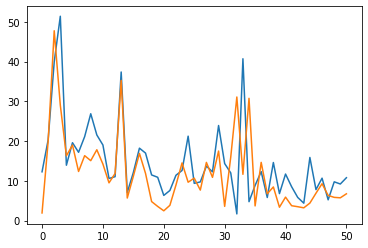

In [31]:
plt.plot(al.qbc_rmse)
plt.plot(gp.gp_rmse)

In [32]:
al.qbc_rmse.mean()

14.690215977990356

In [33]:
gp.gp_rmse.mean()

12.020516736532047